<a href="https://colab.research.google.com/github/Anujay26/OIBSIB/blob/main/RetailData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data Loading and Cleaning


In [ ]:
df = pd.read_csv("retail_sales_dataset.csv")
(df.head())



,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.size

9000

In [ ]:
df.columns.size

9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.isna().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
df.duplicated().sum()

np.int64(0)

##Descriptive Statistics


In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


##Time Series Analysis


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
monthly_sales = df['Total Amount'].resample('M').sum()


<ipython-input-22-3303645401>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()


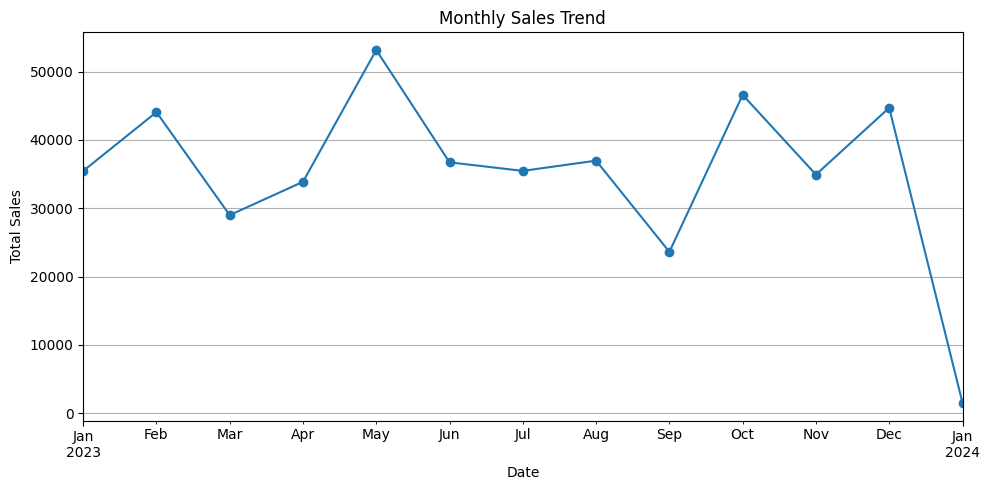

In [ ]:
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', linestyle='-')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

##Customer and Product Analysis


In [ ]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)
print(top_customers.head(10))

Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
CUST416    2000
CUST420    2000
CUST927    2000
CUST447    2000
CUST342    2000
Name: Total Amount, dtype: int64


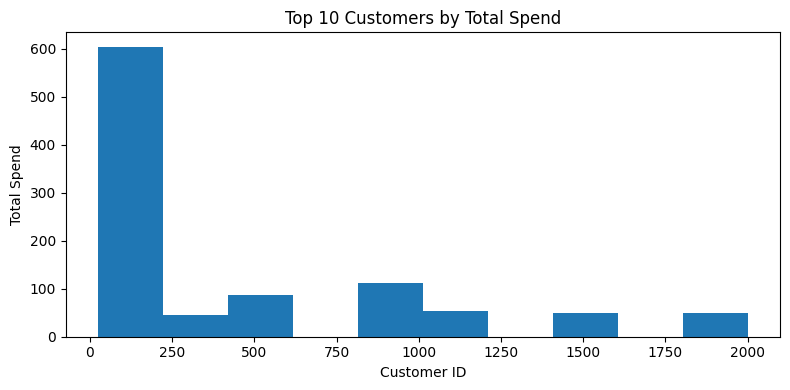

In [ ]:
top_customers.plot(kind='hist', figsize=(8,4), title='Top 10 Customers by Total Spend')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.tight_layout()
plt.show()

In [ ]:
purchase_freq = df['Customer ID'].value_counts()
print(purchase_freq.head(10))

Customer ID
CUST1000    1
CUST001     1
CUST002     1
CUST003     1
CUST004     1
CUST005     1
CUST006     1
CUST007     1
CUST984     1
CUST983     1
Name: count, dtype: int64


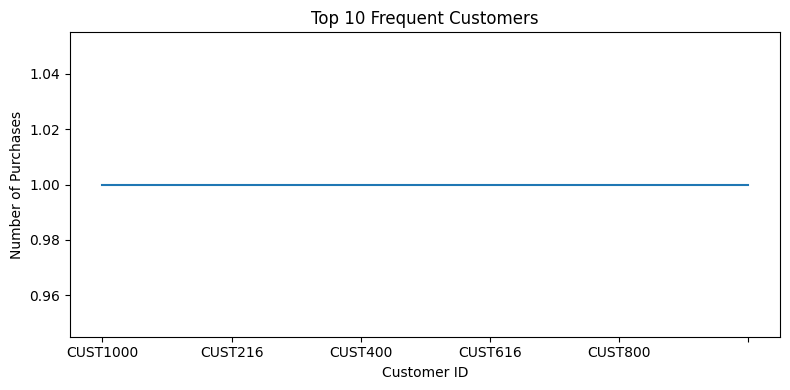

In [ ]:
purchase_freq.plot(kind='line',figsize=(8, 4), title='Top 10 Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

In [ ]:
popular_products = df['Product Category'].value_counts()
print(popular_products.head(10))

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


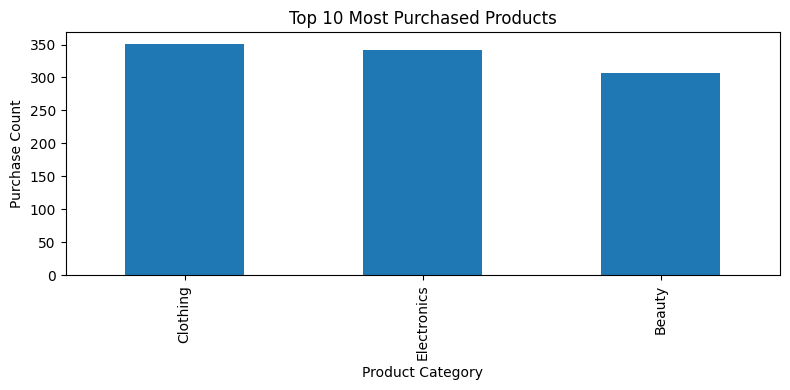

In [ ]:
popular_products.plot(kind='bar', figsize=(8, 4), title='Top 10 Most Purchased Products')
plt.ylabel('Purchase Count')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

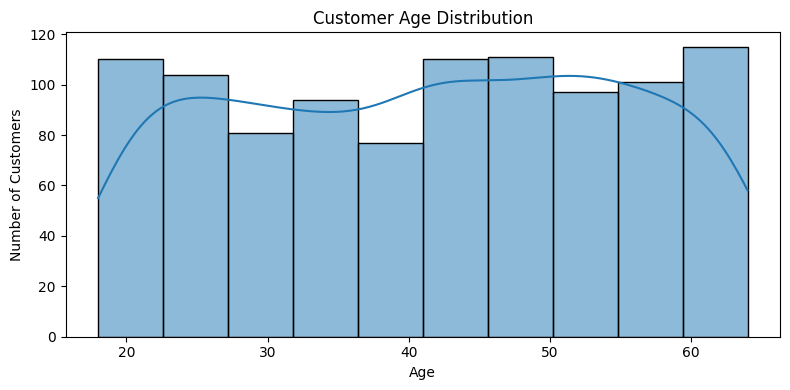

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [ ]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()
print(gender_sales)

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


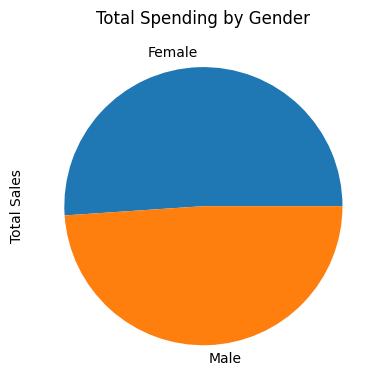

In [ ]:
gender_sales.plot(kind='pie', figsize=(8, 4),color=['pink', 'blue'], title='Total Spending by Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

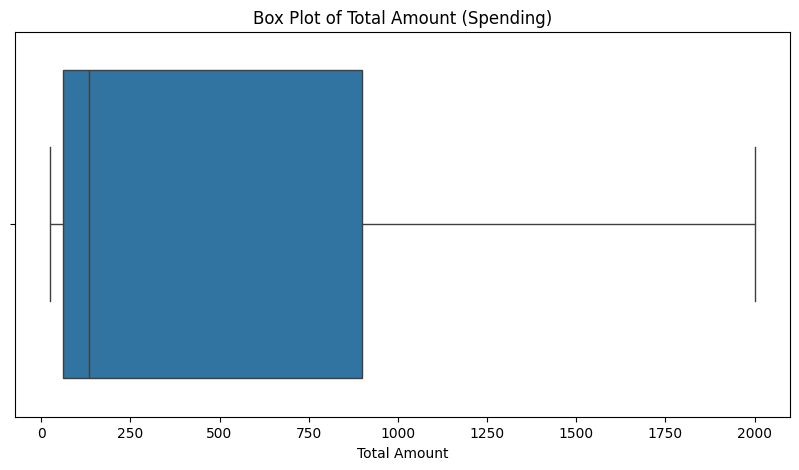

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Total Amount'])
plt.title("Box Plot of Total Amount (Spending)")
plt.xlabel("Total Amount")
plt.show()

In [ ]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(category_sales)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


Text(0, 0.5, 'Total Sales')

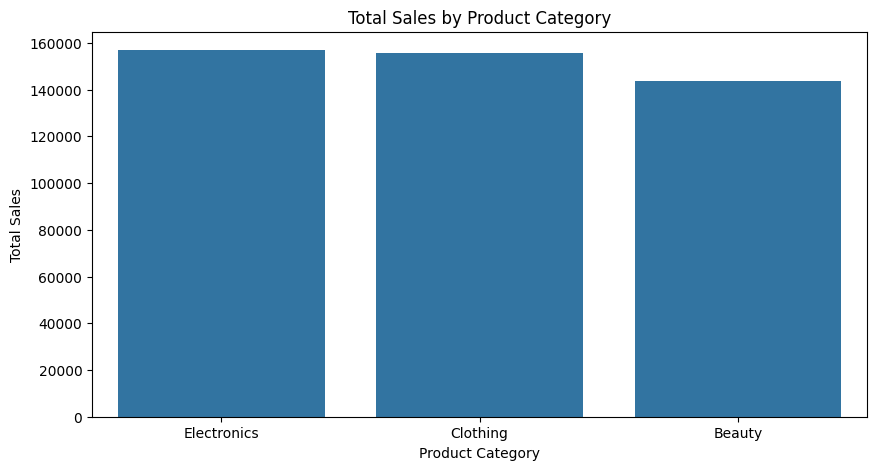

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")

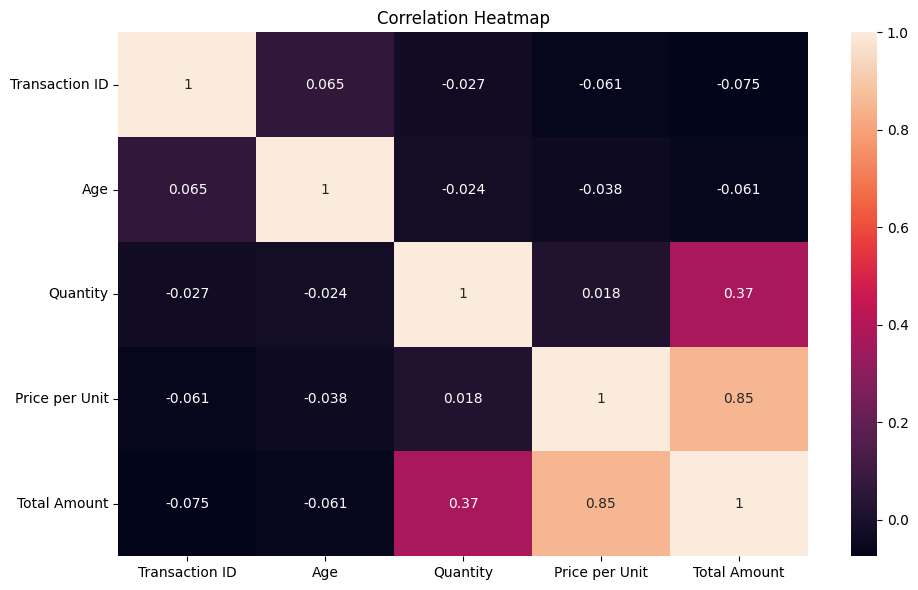

In [ ]:
qwdplt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##Recomendations


Based on the exploratory analysis, the retail business can take several strategic actions. Since Clothing, Electronics, and Beauty are the top-performing categories, inventory planning and marketing campaigns should prioritize these segments. Sales are fairly even across age groups, but targeting promotions to younger and old customers may drive growth, as they are slightly more active. Female customers contribute more to total revenue, so gender-targeted offers may yield higher returns. The strong correlation between Price per Unit and Total Sales suggests that premium pricing strategy works, especially in high-value categories. Lastly, most customers have a single purchase history, so implementing retention strategies like personalized discounts or loyalty programs could significantly boost revenue through repeat business.